In [1]:
import h5py
import numpy as np
import os
from tqdm import tqdm

from resnet3d import Resnet3DBuilder

import keras
from keras.utils import to_categorical
from keras.optimizers import SGD, Nadam
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau
from keras import backend as K

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Training Parameters

In [2]:
input_shape = (3, 256, 256, 3)

class_labels = {0: 'others', 1: 'construction', 2: 'cultivation', 3: 'uncultivation'}
class_labels_inv = {v: k for k,v in class_labels.items()}
num_classes = len(class_labels)

batch_size = 32
nb_epoch = 100

np.random.seed(42)

In [3]:
model_name = 'resNet34_newdata2_leakyrelu_sgd'
dataset_path ='dataset_3d_icasp.h5'
if not os.path.exists(model_name):
    os.mkdir(model_name)

In [4]:
def load_dataset(dataset_path):
    with h5py.File(dataset_path,'r') as f:
        dx = f['data_x'][:]
        dy = f['data_y'][:]  
    return dx, to_categorical(dy, num_classes)

def batch_generator(data_X, data_y, batch_size):
    indexes = np.array(range(len(data_y)))
    n = len(indexes)
    while True:
        batch_start = 0
        batch_end = batch_size
        np.random.shuffle(indexes)
        while batch_start < n:
            index = []
            batch_y = []
            y = []
            index = indexes[batch_start:batch_end]
            batch_x = np.array([data_X[i] for i in index])
            batch_y = np.array([data_y[i] for i in index])
            yield batch_x, batch_y
            batch_start += batch_size   
            batch_end += batch_size

# Model

In [5]:
model = Resnet3DBuilder.build_resnet_34(input_shape=input_shape, num_outputs=num_classes)
model.load_weights(model_name + '/' + model_name+'.h5')

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=K.epsilon(), schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 256, 256,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 2, 128, 128,  65920       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 2, 128, 128,  256         conv3d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 2, 128, 128,  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

# Load and split data

In [6]:
X, y = load_dataset(dataset_path)
print ('Size of dataset:', len(y))
print(X.shape)

('Size of dataset:', 1325)
(1325, 3, 256, 256, 3)


In [7]:
#X_train, y_train = X[:600], y[:600]
#X_val, y_val = X[600:700], y[600:700]
#X_test, y_test = X[700:], y[700:]
#print('Training: {}\tValidation: {}\tTesting: {}'.format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
X_train, y_train = X[600:], y[600:]
X_val, y_val = X[200:400], y[200:400]
X_test, y_test = X[:200], y[:200]
print('Training: {}\tValidation: {}\tTesting: {}'.format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

Training: 725	Validation: 200	Testing: 200


In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
# print('Training: {}\tValidation: {}\tTesting: {}'.format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
for i in range(0,200):
    print(y_test[i])

[0. 0. 1. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]
[1. 0.

In [9]:
assert not np.any(np.isnan(X_train))
assert not np.any(np.isnan(y_train))
assert not np.any(np.isnan(X_val))
assert not np.any(np.isnan(y_val))
assert not np.any(np.isnan(X_test))
assert not np.any(np.isnan(y_test))

In [10]:
train_gen = batch_generator(X_train, y_train, batch_size)
val_gen = batch_generator(X_val, y_val, batch_size)
test_gen = batch_generator(X_test, y_test, batch_size)

In [ ]:
vx = X[1000:]
vy=y[1000:]

In [ ]:
vx, vy = val_gen.next()
print (vx.shape, vy.shape)
image_input = vx[1, :,:,:]
print (image_input.shape)

In [ ]:
#@### load best weights and make sub model
from keras.models import Model, load_model
model.load_weights (model_name+'/'+model_name+'.h5')
sub_model = Model (inputs = model.input, outputs = model.get_layer('add_16').output)
sub_model.summary()

### compute activation of selected layer
sub_output = sub_model.predict (vx)
print (sub_output.shape)

In [ ]:
vx.shape

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages

feature = sub_output#[1,:,:,:]#model.predict(batch_imagesX)  # feature is activation of intermediate layer

pdf = PdfPages( 'test.pdf' )
gs = gridspec.GridSpec(8, 16, top=1., bottom=0., right=1., left=0., hspace=0.,
        wspace=0.)
i =0

for g in gs:
    ax = plt.subplot(g)
    ax.imshow(feature[90][0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    i+=1

pdf.savefig()
pdf.close()

In [ ]:
plt.imshow(vx[90,2,:,:])

In [ ]:
plt.savefig(vx[90,2,:,:])

import matplotlib.cm as cm
W = model.layers[1].get_weights()
#print(W)
W = np.squeeze(W)
W = np.reshape(W[0], (3, 256, 5,5))
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W, 4, 5), cmap=cm.binary)

def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

# Training

In [ ]:
checkpoint = ModelCheckpoint(model_name+'/'+model_name+'.h5', monitor='val_loss', verbose=2, save_best_only=True, mode='auto')
tensorboard = TensorBoard(log_dir=model_name, batch_size=batch_size, write_graph=True, write_images=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=2, mode='auto')
cvslogger = keras.callbacks.CSVLogger(model_name+'/'+model_name+'.csv', separator=',', append=True)

callbacks = [checkpoint, reduce_lr, cvslogger, tensorboard, earlystop]
train_steps = int(len(y_train)//batch_size)
val_steps = int(len(y_test)//batch_size)
history = model.fit_generator(train_gen, train_steps, epochs=nb_epoch, verbose=1, 
                    max_queue_size=2, validation_data=val_gen, 
                    validation_steps=val_steps, shuffle=True,
                    workers=1, use_multiprocessing= False, 
                    initial_epoch=0, callbacks=callbacks)

# Results and evaluation

In [11]:
model.metrics_names

['loss', 'acc']

In [12]:
class_labels = {0: 'others', 1: 'construction', 2: 'cultivation', 3: 'uncultivation'}
class_labels_inv = {v: k for k,v in class_labels.items()}

In [13]:
import pandas as pd

In [14]:
labelled_full_modified = pd.read_csv('kmdupores.csv', index_col=0)

print(labelled_full_modified.shape)
labelled_full_modified.head()

(395, 7)


,11to13,13to17,final_label,lon,lat,x_tile,y_tile
Incorrect,,,,,,,
undefined,others,others,others,85.286522,27.682457,302459,386351
undefined,construction,construction,construction,85.349693,27.664604,302433,386443
undefined,others,others,others,85.333900,27.736702,302538,386420
undefined,others,construction,construction,85.352440,27.657738,302423,386447
undefined,others,others,others,85.322914,27.721596,302516,386404


In [15]:
for ind,row in tqdm(labelled_full_modified.iterrows()):
    print(row.y_tile)
    

395it [00:00, 3468.11it/s]

386351
386443
386420
386447
386404
386405
386467
386467
386379
386456
386457
386465
386465
386391
386372
386353
386378
386460
386415
386429
386456
386350
386425
386395
386408
386441
386353
386356
386467
386443
386351
386434
386474
386451
386376
386463
386423
386355
386380
386419
386461
386379
386418
386432
386393
386403
386369
386428
386380
386408
386391
386385
386371
386418
386435
386353
386369
386435
386446
386351
386377
386452
386410
386382
386438
386438
386422
386456
386458
386426
386425
386478
386410
386437
386458
386438
386372
386366
386421
386376
386392
386371
386466
386376
386452
386370
386369
386428
386420
386471
386383
386463
386417
386470
386420
386375
386368
386424
386448
386367
386382
386351
386419
386426
386383
386358
386419
386465
386374
386394
386405
386358
386367
386417
386425
386456
386473
386394
386441
386473
386455
386399
386396
386403
386457
386421
386362
386381
386434
386415
386390
386426
386411
386420
386389
386448
386477
386403
386451
386351
386432
386445
386422

In [16]:

def make_filename(x_tile, y_tile, year):
    if year in [11, 13]:
        tempelate = 'gesh_{}_{}_20.jpg'
    else:
        tempelate = 'ges_{}_{}_20.jpg'
    return tempelate.format(y_tile, x_tile)

import cv2

In [13]:
input_shape = (3, 256, 256, 3)

num_examples = labelled_full_modified.shape[0]
data_tx = np.zeros((num_examples,) + input_shape)
data_ty = np.zeros((num_examples, 1))
test11='../../kmdu311213/newtask/'
test13='../../kmdu311215/newtask/'
test17='../../kmdu311218/newtask/'

i = 0
for ind,row in tqdm(labelled_full_modified.iterrows()):
    fname11 = make_filename(row.x_tile, row.y_tile, 11)
    fname13 = make_filename(row.x_tile, row.y_tile, 13)
    fname17 = make_filename(row.x_tile, row.y_tile, 17)
    #print(fname17)
    img11 = cv2.imread(os.path.join(test11, fname11))
    img13 = cv2.imread(os.path.join(test13, fname13))
    img17 = cv2.imread(os.path.join(test17, fname17))
    
    
    if (img11 is None) or (img13 is None) or (img17 is None):
        print("helo")    
        with open('missing.csv', 'a') as f:
            f.write('missing,missing,{},{},\n'.format(row.x_tile, row.y_tile))
        continue
    
    data_tx[i, :, :, :, :] = np.stack([img11, img13, img17], axis=0)
    data_ty[i] = class_labels_inv[row.final_label]
    #print(data_ty[i])
    i=i+1

161it [00:00, 395.23it/s]

helo
helo


317it [00:00, 390.23it/s]

helo
helo


395it [00:01, 389.37it/s]


In [ ]:
test_gen = batch_generator(data_tx,data_ty, batch_size)

input_shape = (3, 256, 256, 3)

num_examples = labelled_full_modified.shape[0]
data_tx = np.zeros((num_examples,) + input_shape)
data_ty = np.zeros((num_examples, 1))
test11='../../kmdu311213/newtask/'
test13='../../kmdu311215/newtask/'
test17='../../kmdu311218/newtask/'

i = 0
for ind,row in tqdm(labelled_full_modified.iterrows()):
    fname11 = make_filename(row.x_tile, row.y_tile, 11)
    fname13 = make_filename(row.x_tile, row.y_tile, 13)
    fname17 = make_filename(row.x_tile, row.y_tile, 17)
    print(fname17)
    img11 = cv2.imread(os.path.join(test11, fname11))
    img13 = cv2.imread(os.path.join(test13, fname13))
    img17 = cv2.imread(os.path.join(test17, fname17))
    

    if (img11 is None) or (img13 is None) or (img17 is None):
        with open('missing.csv', 'a') as f:
            f.write('missing,missing,{},{},\n'.format(row.x_tile, row.y_tile))
        continue
    
    data_tx[i, :, :, :, :] = np.stack([img11, img13, img17], axis=0)
    data_ty[i] = class_labels_inv[row.final_label]
    print(data_ty[i])

In [ ]:
for ind,row in tqdm(labelled_full_modified.iterrows()):
    print(row.final_label)

sgd + relu --> 76
sgd + selu --> 75
sgd + leakyrelu --> 75
nadam + selu --> 73

In [ ]:
model.evaluate_generator(test_gen, steps=len(data_tx)/batch_size)

In [ ]:
print(data_ty[0])

In [14]:
preds = model.predict(data_tx)
print(preds[0])
preds_bin = (preds == preds.max(axis=1, keepdims=True)).astype(int)
preds.shape

[0.92715764 0.03525849 0.03088816 0.00669568]


(395, 4)

In [15]:
pres_classes = []
for p in preds.argmax(axis=1):
    pres_classes.append(class_labels[p])
print(pres_classes)

['others', 'construction', 'others', 'others', 'construction', 'others', 'construction', 'construction', 'construction', 'others', 'others', 'others', 'others', 'construction', 'construction', 'others', 'construction', 'others', 'others', 'others', 'others', 'others', 'others', 'construction', 'construction', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'construction', 'others', 'others', 'others', 'construction', 'others', 'others', 'construction', 'construction', 'construction', 'others', 'construction', 'construction', 'construction', 'others', 'others', 'construction', 'construction', 'construction', 'construction', 'others', 'others', 'others', 'others', 'construction', 'construction', 'others', 'construction', 'others', 'construction', 'others', 'others', 'others', 'others', 'construction', 'construction', 'others', 'others', 'construction', 'construction', 'others', 'construction', 'others', 'others', 'others', 'others', 'construction

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data_tx[0,0,:,:])

In [16]:
truth_classes = []
for ind,row in tqdm(labelled_full_modified.iterrows()):
    truth_classes.append(row.final_label)
print(truth_classes)


395it [00:00, 8558.30it/s]

['others', 'construction', 'others', 'construction', 'others', 'others', 'construction', 'construction', 'construction', 'others', 'construction', 'others', 'construction', 'others', 'construction', 'others', 'others', 'construction', 'construction', 'others', 'construction', 'construction', 'construction', 'others', 'construction', 'construction', 'construction', 'others', 'others', 'construction', 'others', 'construction', 'others', 'others', 'others', 'construction', 'others', 'others', 'others', 'construction', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'others', 'construction', 'others', 'others', 'others', 'construction', 'construction', 'others', 'construction', 'construction', 'others', 'others', 'construction', 'construction', 'construction', 'construction', 'others', 'others', 'construction', 'construction', 'construction', 'construction', 'construction', 'construction', 'construction', 'others', 'others', 'construction', 'others

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 60   0  87]
 [  0   0   4]
 [101   2 141]]


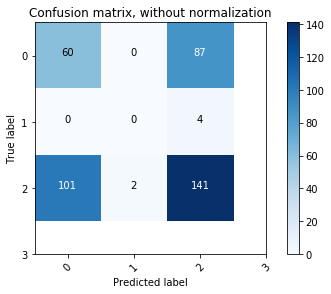

In [20]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_test =truth_classes
y_pred =pres_classes 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')

In [ ]:
len(truth_classes)

In [ ]:
len(pres_classes)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('comparison3.csv')
print(df.shape)
df.head()
df['3d_pred']

In [ ]:
df['3d_pred'] = pres_classes
df['truth'] = truth_classes
df.head()

In [ ]:
np.savetxt('kmdu comp.csv',pres_classes,truth_classes)

In [ ]:
print('2d accuracy')
(df['2d_pred'] == df['truth']).sum() / float(len(df))

In [ ]:
print('3d accuracy')
(df['3d_pred'] == df['truth']).sum() / float(len(df))

In [ ]:
df.to_csv('comparison4kmd.csv', index=False, header=True)

In [ ]:
df = pd.read_.size()csv('comparison4kmd.csv')
print(df.shape)
df.head()

In [ ]:
df['3d_pred'] = pres_classes
df['truth'] = truth_classes
df.head()

In [ ]:
np.sum(np.all(preds_bin == y_test.astype(int), axis=1)) / float(len(y_test))

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
class_labels = {0: 'others', 1: 'construction', 2: 'cultivation', 3: 'uncultivation'}

In [ ]:
for imgnum in tqdm(range(len(preds))):
#     imgnum = 112

    fig = plt.figure(figsize=(15, 20))
    plt.subplot(131)
    plt.imshow(X_test[imgnum, 0][:,:,::-1])
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(X_test[imgnum, 1][:,:,::-1])
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(X_test[imgnum, 2][:,:,::-1])
    plt.axis('off')

    pred_label = class_labels[preds[imgnum].argmax()]
    truth = class_labels[y_test[imgnum].astype(int)[0]]

    probs_msg = ' /\ '.join([c+': '+str(p) for c,p in zip(class_labels.values(), preds[imgnum])])
    preds_msg = 'pred3d: {} /\ pred2d: {}  /\  truth: {}'.format(pred_label, df['2d_pred'].iloc[imgnum], truth)

    fig.text(0.1, 0.62, probs_msg, fontsize=12)
    fig.text(0.1, 0.6, preds_msg, fontsize=12)

    plt.savefig('final_results_comparison/{}.png'.format(imgnum), bbox_inches='tight')
    plt.close()

In [ ]:
from keras.utils.visualize_util import plot  
plot(model, to_file='model.png')  
